In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

W0624 14:07:33.146305 11856 deprecation.py:323] From <ipython-input-4-319879c4c296>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0624 14:07:33.154300 11856 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0624 14:07:33.155297 11856 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0624 14:07:33.534067 11856 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0624 14:07:33.538065 11856 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0624 14:07:33.619015 11856 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print('train', mnist.train.num_examples, 'validation', mnist.validation.num_examples, 'test', mnist.test.num_examples)

train 55000 validation 5000 test 10000


In [6]:
print('train_images:', mnist.train.images.shape, 'labels', mnist.train.labels.shape)

train_images: (55000, 784) labels (55000, 10)


In [7]:
print(len(mnist.train.images[0]))
mnist.train.images[0]

784


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()

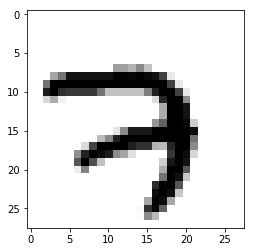

In [9]:
plot_image(mnist.train.images[0])

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
np.argmax(mnist.train.labels[0])

7

In [12]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap='binary')
        title = 'label=' + str(np.argmax(labels[idx]))
        if len(prediction) > 0:
            title += ', predict=' + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

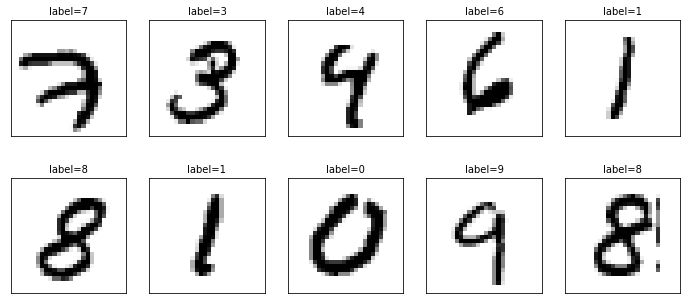

In [13]:
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)

In [14]:
print(' validation images:', mnist.validation.images.shape, 'labels:', mnist.validation.labels.shape)

 validation images: (5000, 784) labels: (5000, 10)


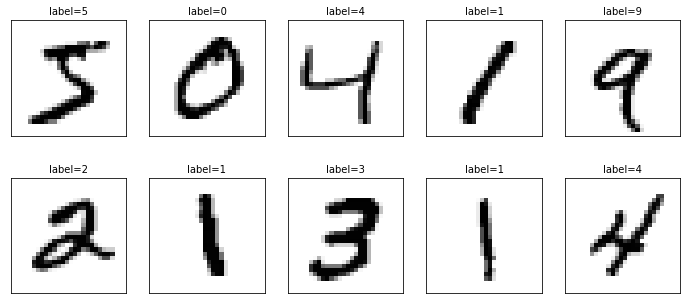

In [15]:
plot_images_labels_prediction(mnist.validation.images, mnist.validation.labels, [], 0)

In [16]:
print('test_image:', mnist.test.images.shape, 'labels:', mnist.test.labels.shape)

test_image: (10000, 784) labels: (10000, 10)


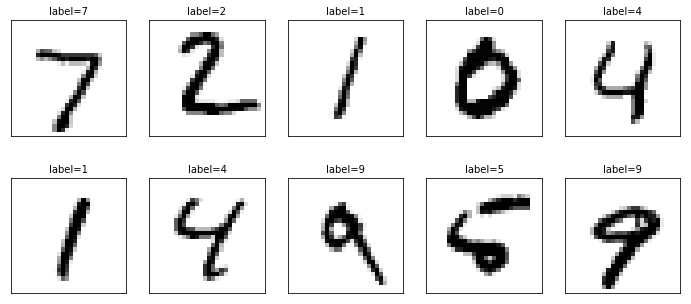

In [17]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, [], 0)

In [18]:
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=100)

In [19]:
print(len(batch_images_xs), len(batch_labels_ys))

100 100


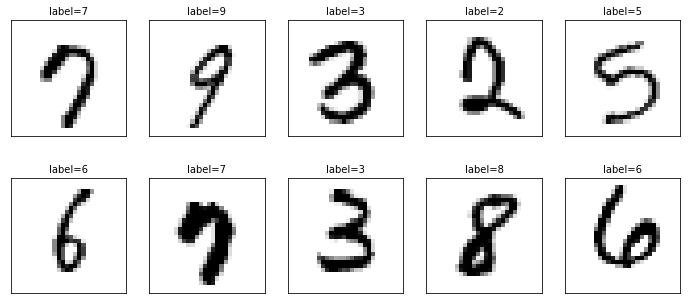

In [20]:
plot_images_labels_prediction(batch_images_xs, batch_labels_ys, [], 0)